<a href="https://colab.research.google.com/github/LCaravaggio/EscueladeInnovacion/blob/main/OCR_y_An%C3%A1lisis_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR y tokenización

In [1]:
import requests

In [2]:
link='https://www.senado.gob.ar/parlamentario/sesiones/2727/descargarDiario'
raw=""
ty="PdfReader"
pdf = requests.get(link)
my_raw_data = pdf.content

In [3]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.2 MB/s eta 0:00:00


In [4]:
from io import BytesIO
import PyPDF2
if pdf.status_code==200:
       with BytesIO(my_raw_data) as data:
         read_pdf = PyPDF2.PdfReader(data)
         for page in range(len(read_pdf.pages)):
           raw+=read_pdf.pages[page].extract_text()

In [5]:
raw

'15 de mayo de 2024  Sesión informativa especial  Pág. 1 \n \nDirección General de Taquígrafos  \n \n  \n \n \n \n \n \n \n \n \n \n \n \n \nPERÍODO 142°  \n \n \n \n \n \n15 de mayo  de 2024  \n  PENDIENTE DE APROBACIÓN  (artículo 32, inciso m del Reglamento de la Cámara de Senadores de la Nación.)  \n4° REUNIÓN  \n1° SESIÓN INFORMATIVA \nESPECIAL  15 de mayo de 2024  Sesión informativa especial  Pág. 2 \n \nDirección General de Taquígrafos   \n \nA U T O R I D A D E S  \n \n \nPresidencia del Senado  \nVictoria Villarruel  \n \n \nPresidencia Provisional  \nBartolomé Esteban Abdala  \n \n \nVicepresidencia  \nSilvia Sapag  \n \n \nVicepresidencia primera  \nCarolina Losada  \n \n \nVicepresidencia segunda  \nAlejandra María Vigo  \n \n \n \nSecretaría Administrativa  \nMaría Laura Izzo  \n \n \nSecretaría Parlamentaria  \nAgustín Giustinian  \n \n \nProsecretaría Administrativa  \nLucas Clark  \n \n \nProsecretaría Parlamentaria  \nDolores Martínez  \n \n \nProsecretaría de Coordinac

In [6]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(raw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
vocabulary = set(tokens)

In [11]:
from nltk.corpus import stopwords
import re

nltk.download("stopwords")
stopwords = set(stopwords.words('spanish'))

filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

shortword = re.compile(r'\b\w{1,3}\b')
unwanted_chars = re.compile(r'[^\w\s]')
filtered_tokens = [unwanted_chars.sub('', shortword.sub('', word)) for word in filtered_tokens]

manual=['', '2024']
filtered_tokens = [word for word in filtered_tokens if word.lower() not in manual]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


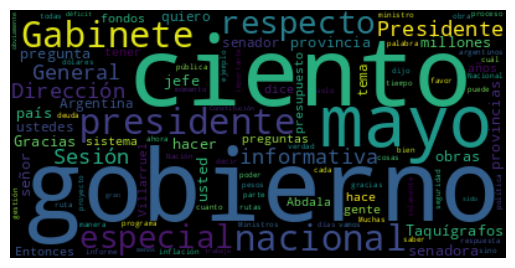

In [14]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

word_freq = Counter(filtered_tokens)

# Generar la nube de palabras a partir de las frecuencias
wordcloud = WordCloud(stopwords=stopwords).generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

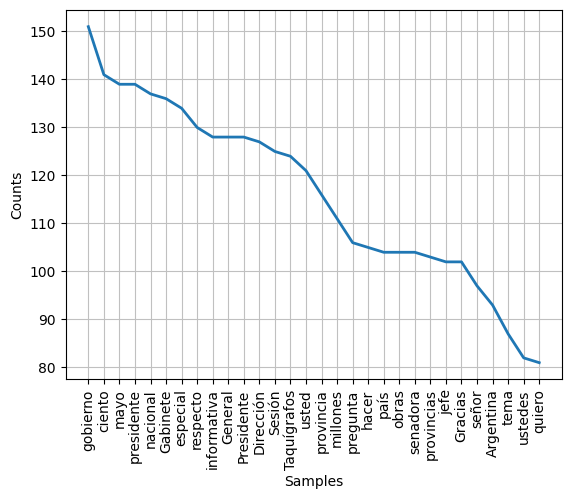

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
fd = nltk.FreqDist(filtered_tokens)
fd.plot(30, cumulative=False)

In [16]:
import pandas as pd
df = pd.DataFrame(list(fd.items()), columns=['Token', 'Frequency'])
df = df.sort_values(by='Frequency', ascending=False)

In [17]:
df[:20]

,Token,Frequency
797,gobierno,151
410,ciento,141
0,mayo,139
455,presidente,139
223,nacional,137
232,Gabinete,136
3,especial,134
861,respecto,130
2,informativa,128
5,General,128


# Análisis de Sentimiento

In [18]:
%%capture
!pip install pysentimiento

In [19]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:81: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [20]:
analyzer.predict("Qué gran jugador es Messi")

AnalyzerOutput(output=POS, probas={POS: 0.946, NEU: 0.037, NEG: 0.017})

In [21]:
analyzer.predict("Esto es pésimo")

AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.098, POS: 0.014})

In [22]:
analyzer.predict("Qué es esto?")

AnalyzerOutput(output=NEU, probas={NEU: 0.548, NEG: 0.412, POS: 0.041})

In [23]:
analyzer.predict("jejeje no te creo mucho")

AnalyzerOutput(output=NEU, probas={NEU: 0.519, NEG: 0.415, POS: 0.066})

Ironía

In [24]:
analyzer = create_analyzer(task="irony", lang="es")

config.json:   0%|          | 0.00/915 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [25]:
analyzer.predict("no, si sos un genio vos")

AnalyzerOutput(output=ironic, probas={ironic: 0.886, not ironic: 0.114})

In [26]:
analyzer.predict("sos un genio vos, te aprecio mucho")

AnalyzerOutput(output=not ironic, probas={not ironic: 0.962, ironic: 0.038})

Emoción

In [27]:
analyzer = create_analyzer(task="emotion", lang="es")

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [28]:
analyzer.predict("no puedo creer lo que está pasando. No sé cómo describirlo con palabras")

AnalyzerOutput(output=surprise, probas={surprise: 0.678, sadness: 0.206, fear: 0.083, disgust: 0.010, others: 0.010, anger: 0.008, joy: 0.006})

In [29]:
analyzer.predict("Todos vamos a morir")

AnalyzerOutput(output=sadness, probas={sadness: 0.881, others: 0.049, anger: 0.030, disgust: 0.024, fear: 0.007, joy: 0.007, surprise: 0.002})